In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("population_data")

In [3]:
data.rename(columns={
    'Age Group': "Age",
    'Year': "Year",
    'Males': "Males", 
    'Females':"Females"},inplace=True)

In [4]:
data.Age = data.Age.fillna(method="ffill")

In [5]:
data.Males = data.Males.str.replace(",","")
data.Males = data.Males.astype(int)


data.Females = data.Females.str.replace(",","")
data.Females = data.Females.astype(int)

In [6]:
sns.set_theme(
    context='paper',
    style='ticks',
    palette='pastel')

In [7]:
test_data = data[data.Year == 2020]
x = test_data.Age
y_male = test_data.Males
y_female = -test_data.Females

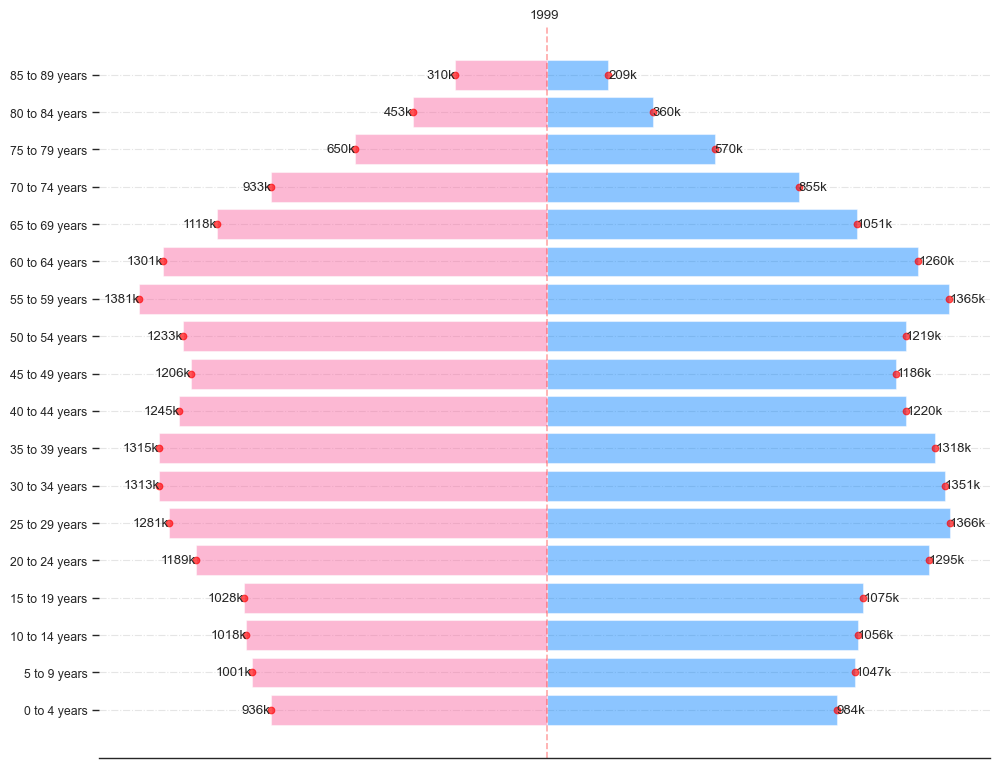

In [9]:
figure,ax = plt.subplots(figsize=(11.5,9.5))

bar_males = ax.barh(x,
                    y_male,
                    color="#007FFF",
                    alpha=0.45)


bar_females = ax.barh(x,
                      y_female,
                      color="#F9629F",
                      alpha=0.45)

ax.scatter(y_male,
        x,
        color="#FF0000",
        alpha=0.65)

ax.scatter(y_female,
        x,
        color="#FF0000",
        alpha=0.65)


ax.bar_label(bar_males,
             labels=[str(int(i // 1e3)) + "k" for i in y_male])
ax.bar_label(bar_females,
             labels=[str(int(abs(i // 1e3))) + "k" for i in y_female])



ax.axvline(0,color="#FF0000",ls="--",alpha=0.35)

ax.set_xticks([])
ax.grid(True,alpha=0.5,ls="-.")

plt.title("1999")

sns.despine(left=True)
plt.show()